In [1]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import pickle
from sklearn.model_selection import train_test_split

In [3]:
path = r"C:\Users\Nasim\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Dataset 3 - Flu Classification\Flu_Classification1.csv"
df = pd.read_csv(path)
df.head(10)

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,67.0,38.111111,F,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
1,29.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,22.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
3,20.0,36.555556,F,unknown,Yes,Yes,unknown,No,unknown,Yes,unknown,H1N1
4,21.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
5,22.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
6,19.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
7,60.0,38.166667,M,unknown,No,Yes,unknown,No,unknown,No,unknown,H1N1
8,46.0,38.611111,F,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
9,18.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1


In [4]:
df = df.iloc[0:1484,[0,2,3,25,31,32,33,34,35,36,41,46,49]]
df.head(10)

IndexError: positional indexers are out-of-bounds

In [4]:
df["Age"].fillna(0, inplace = True)
df["Temperature"].fillna(0, inplace = True)
df["Sex"].fillna("unknown", inplace = True)
df["RiskFactors"].fillna("unknown", inplace = True)
df["Diarrhea"].fillna("unknown", inplace = True)
df["Fever"].fillna("unknown", inplace = True)
df["ShortnessOfBreath"].fillna("unknown", inplace = True)
df["SoreThroat"].fillna("unknown", inplace = True)
df["NauseaVomitting"].fillna("unknown", inplace = True)
df["Fatigue"].fillna("unknown", inplace = True)
df["Cancer"].fillna("unknown", inplace = True)
df["Coughing"].fillna("unknown", inplace = True)
df.head(10)

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
0,H1N1,67.0,F,unknown,unknown,Yes,Yes,unknown,No,unknown,38.111111,No,unknown
1,H1N1,29.0,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
2,H1N1,22.0,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
3,H1N1,20.0,F,immuno,unknown,Yes,Yes,unknown,No,unknown,36.555556,Yes,unknown
4,H1N1,21.0,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
5,H1N1,22.0,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
6,H1N1,19.0,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
7,H1N1,60.0,M,"Renal Disease, athero",unknown,No,Yes,unknown,No,unknown,38.166667,No,unknown
8,H1N1,46.0,F,unknown,unknown,Yes,Yes,unknown,No,unknown,38.611111,No,unknown
9,H1N1,18.0,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown


In [5]:
df.Diagnosis = df.Diagnosis.astype("category").cat.codes
df.Sex = df.Sex.astype("category").cat.codes
df.RiskFactors = df.RiskFactors.astype("category").cat.codes
df.Diarrhea = df.Diarrhea.astype("category").cat.codes
df.Fever = df.Fever.astype("category").cat.codes
df.Coughing = df.Coughing.astype("category").cat.codes
df.ShortnessOfBreath = df.ShortnessOfBreath.astype("category").cat.codes
df.SoreThroat = df.SoreThroat.astype("category").cat.codes
df.NauseaVomitting = df.NauseaVomitting.astype("category").cat.codes
df.Fatigue = df.Fatigue.astype("category").cat.codes
df.Cancer = df.Cancer.astype("category").cat.codes
df.head()

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
0,1,67.0,0,63,2,1,1,2,0,2,38.111111,0,1
1,1,29.0,1,63,2,2,2,2,2,2,0.000000,2,1
2,1,22.0,0,63,2,2,2,2,2,2,0.000000,2,1
3,1,20.0,0,53,2,1,1,2,0,2,36.555556,1,1
4,1,21.0,1,63,2,2,2,2,2,2,0.000000,2,1


C:\Users\Nasim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


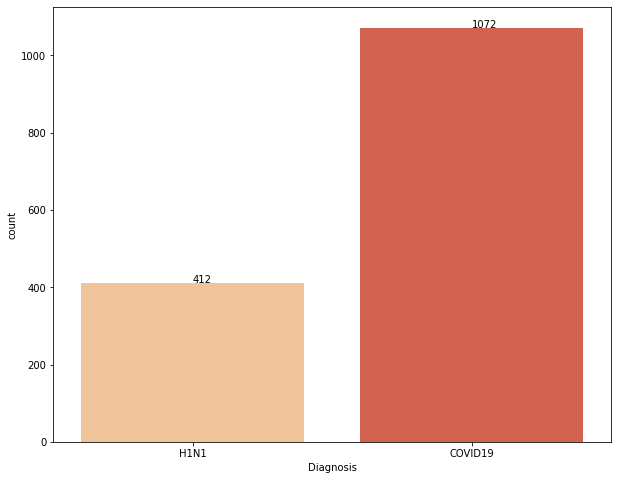

In [6]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['Diagnosis'], palette='OrRd')
ax.set_xticklabels(['H1N1','COVID19'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

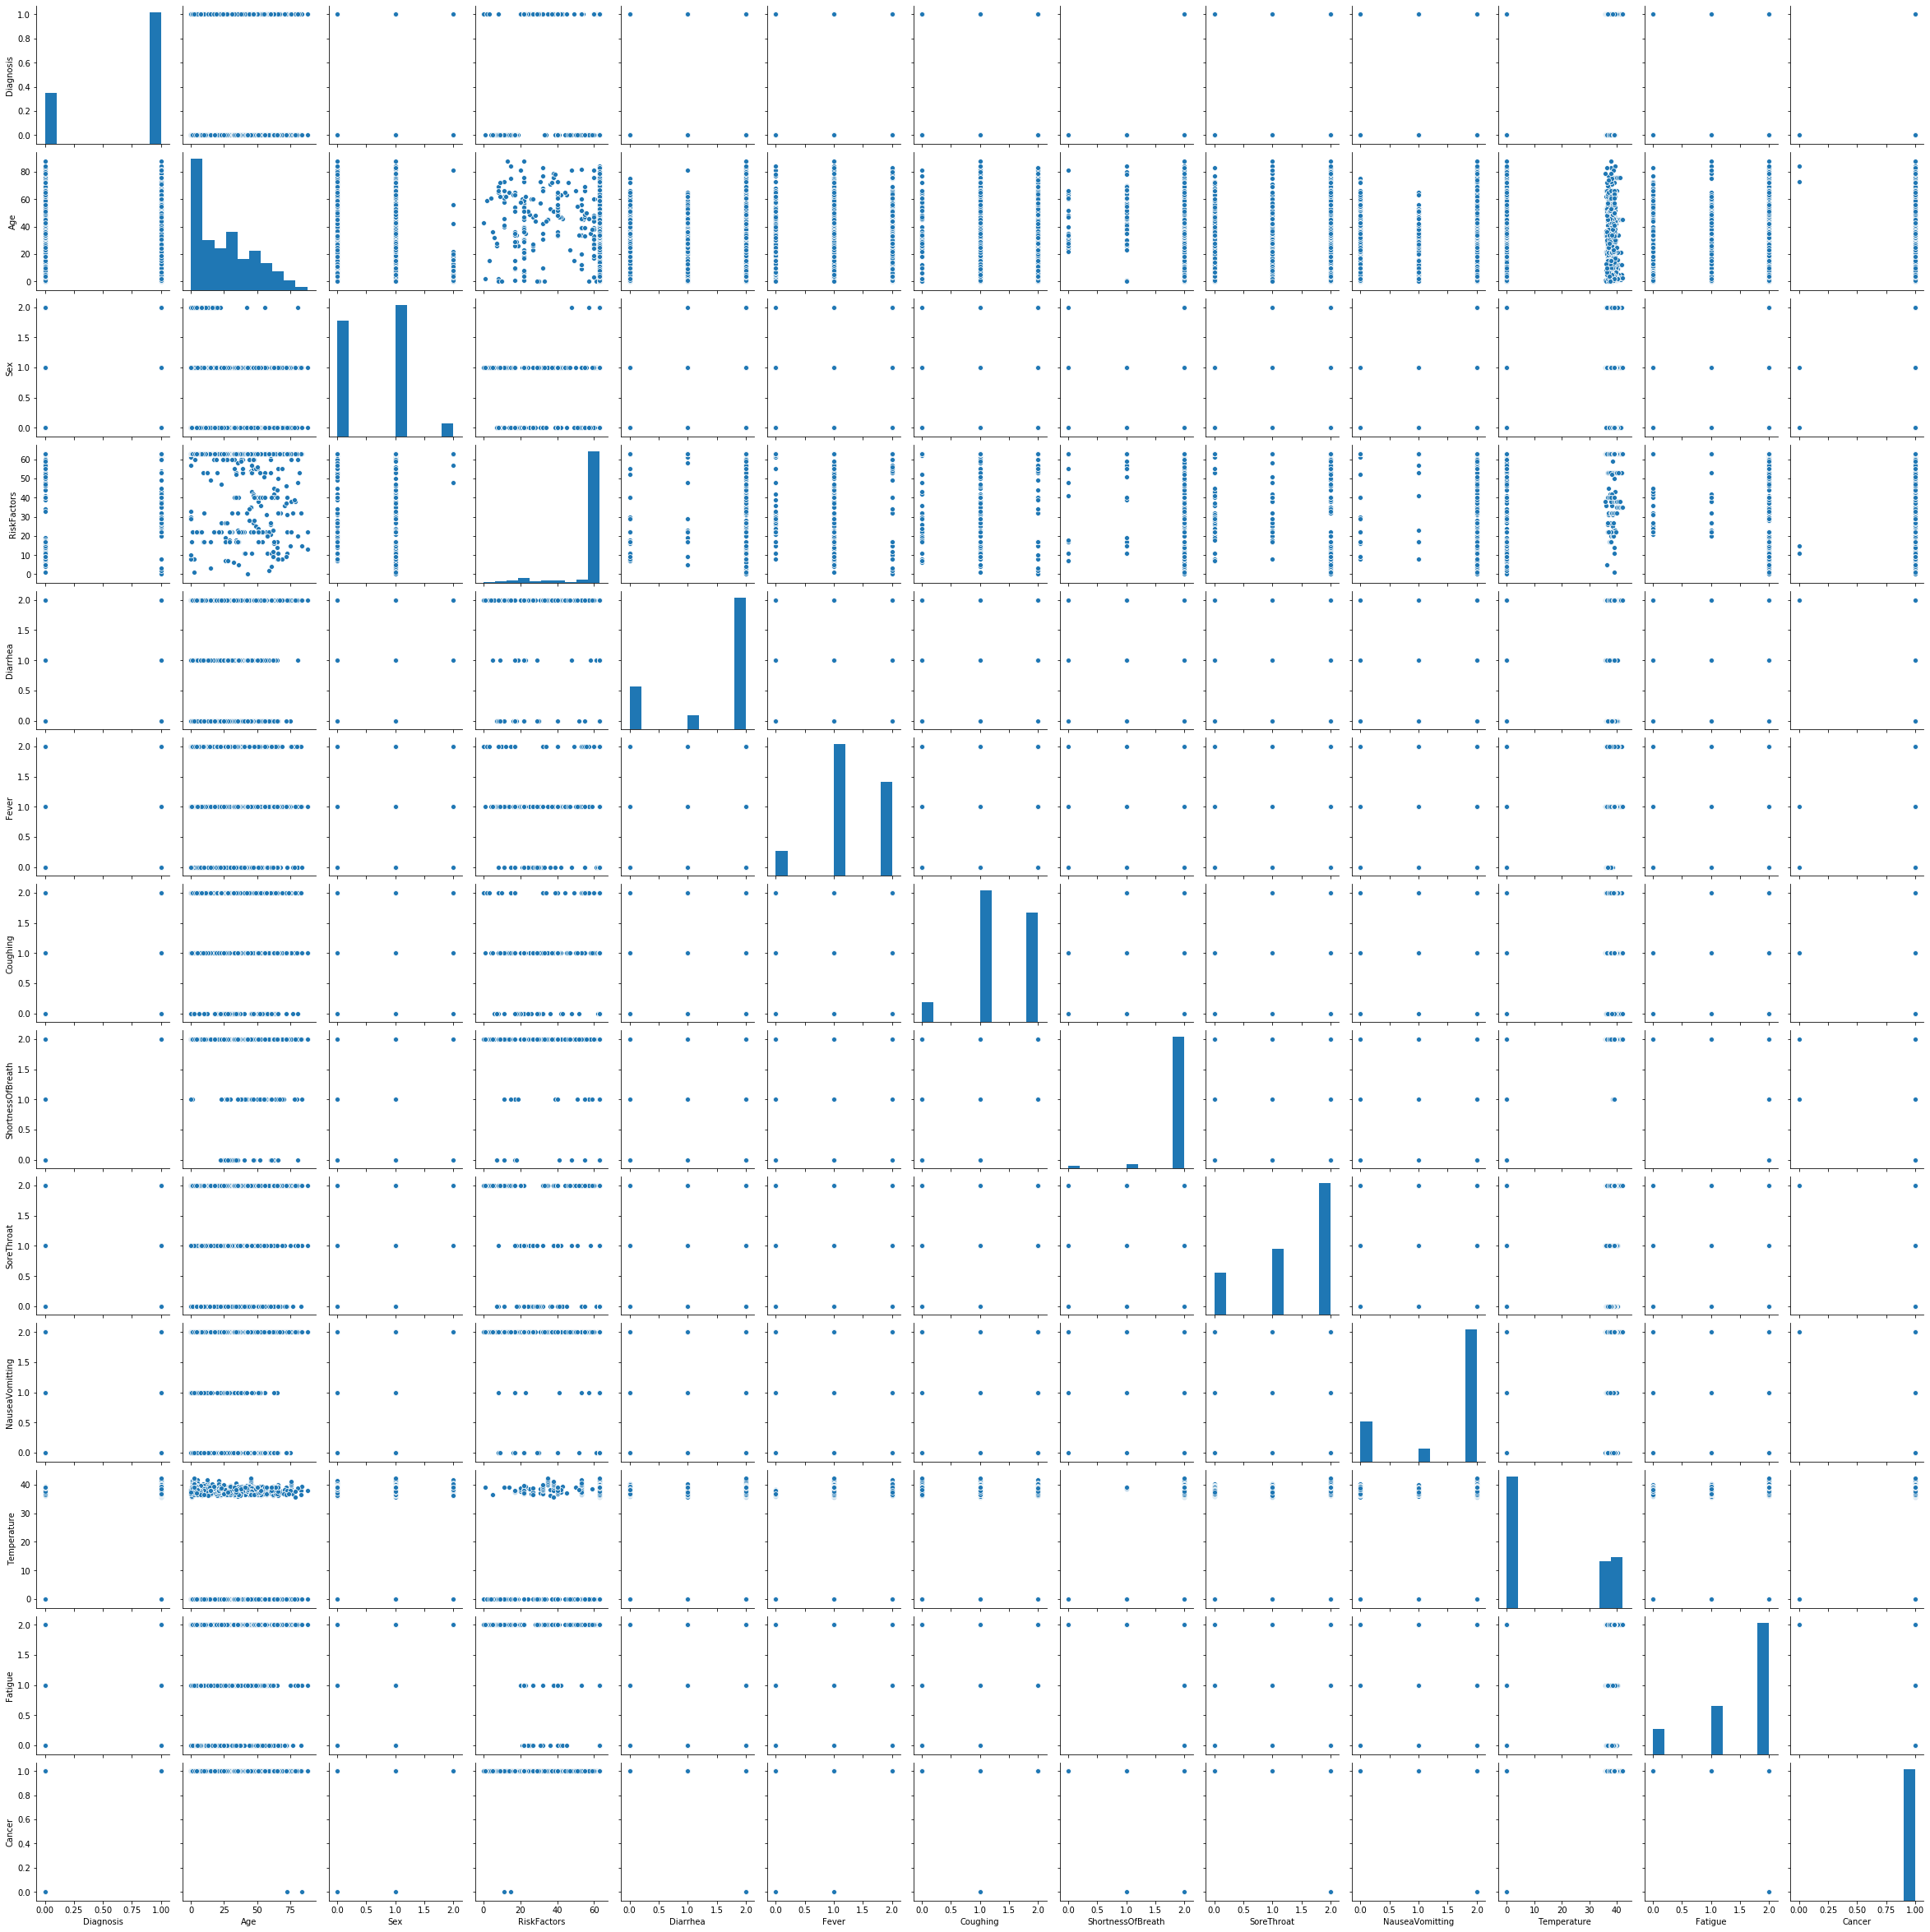

In [29]:
sns.pairplot(df)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.tree import plot_tree
from timeit import default_timer as timer

In [8]:
x = df.iloc[:,1:]
x.head()

,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
0,67.0,0,63,2,1,1,2,0,2,38.111111,0,1
1,29.0,1,63,2,2,2,2,2,2,0.000000,2,1
2,22.0,0,63,2,2,2,2,2,2,0.000000,2,1
3,20.0,0,53,2,1,1,2,0,2,36.555556,1,1
4,21.0,1,63,2,2,2,2,2,2,0.000000,2,1


In [9]:
y = df.iloc[:,0]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int8

In [19]:
path = r"C:\Users\Nasim\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Dataset 3 - Flu Classification\Flu_Classification_Training_Dataset.csv"
dfTrain = pd.read_csv(path)
dfTrain.head(10)

,Age,Temperature,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,5.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
1,13.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,0.0,0.000000,F,unknown,No,Yes,Yes,unknown,Yes,No,unknown,unknown,H1N1
3,26.0,39.000000,F,unknown,unknown,Yes,No,unknown,Yes,unknown,No,unknown,H1N1
4,44.0,0.000000,M,unknown,unknown,No,Yes,unknown,Yes,unknown,No,unknown,H1N1
5,10.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
6,57.0,38.500000,M,athero,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
7,4.0,37.000000,M,asthma,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
8,29.0,37.611111,M,unknown,No,No,Yes,unknown,Yes,No,Yes,unknown,H1N1
9,6.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1


In [11]:
dfTrain.Diagnosis = dfTrain.Diagnosis.astype("category").cat.codes
dfTrain.Sex = dfTrain.Sex.astype("category").cat.codes
dfTrain.RiskFactors = dfTrain.RiskFactors.astype("category").cat.codes
dfTrain.Diarrhea = dfTrain.Diarrhea.astype("category").cat.codes
dfTrain.Fever = dfTrain.Fever.astype("category").cat.codes
dfTrain.Coughing = dfTrain.Coughing.astype("category").cat.codes
dfTrain.ShortnessOfBreath = dfTrain.ShortnessOfBreath.astype("category").cat.codes
dfTrain.SoreThroat = dfTrain.SoreThroat.astype("category").cat.codes
dfTrain.NauseaVomitting = dfTrain.NauseaVomitting.astype("category").cat.codes
dfTrain.Fatigue = dfTrain.Fatigue.astype("category").cat.codes
dfTrain.Cancer = dfTrain.Cancer.astype("category").cat.codes

In [12]:
x_train = dfTrain.iloc[:,:-1]

In [13]:
y_train = dfTrain.iloc[:,-1]

In [20]:
path = r"C:\Users\Nasim\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Dataset 3 - Flu Classification\Flu_Classification_Testing_Dataset.csv"
dfTest = pd.read_csv(path)
dfTest.head(10)

,Age,Temperature,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,22.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
1,21.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,19.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
3,55.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
4,60.0,36.777778,F,"asthma, congestive, diabetes",unknown,No,No,unknown,No,unknown,No,unknown,H1N1
5,65.0,38.111111,F,unknown,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
6,35.0,0.000000,F,unknown,unknown,No,No,unknown,No,unknown,No,unknown,H1N1
7,19.0,0.000000,F,unknown,unknown,No,No,unknown,No,unknown,No,unknown,H1N1
8,49.0,38.444444,F,"asthma, chronic, diabetes",unknown,Yes,Yes,unknown,Yes,unknown,No,unknown,H1N1
9,77.0,36.944444,F,chronic,unknown,No,No,unknown,No,unknown,No,unknown,H1N1


In [21]:
dfTest.Diagnosis = dfTest.Diagnosis.astype("category").cat.codes
dfTest.Sex = dfTest.Sex.astype("category").cat.codes
dfTest.RiskFactors = dfTest.RiskFactors.astype("category").cat.codes
dfTest.Diarrhea = dfTest.Diarrhea.astype("category").cat.codes
dfTest.Fever = dfTest.Fever.astype("category").cat.codes
dfTest.Coughing = dfTest.Coughing.astype("category").cat.codes
dfTest.ShortnessOfBreath = dfTest.ShortnessOfBreath.astype("category").cat.codes
dfTest.SoreThroat = dfTest.SoreThroat.astype("category").cat.codes
dfTest.NauseaVomitting = dfTest.NauseaVomitting.astype("category").cat.codes
dfTest.Fatigue = dfTest.Fatigue.astype("category").cat.codes
dfTest.Cancer = dfTest.Cancer.astype("category").cat.codes

In [22]:
x_test = dfTest.iloc[:,:-1]

In [23]:
y_test = dfTest.iloc[:,-1]

In [24]:
dfTrain['Diagnosis'].value_counts()

H1N1       812
COVID19    301
Name: Diagnosis, dtype: int64

In [25]:
dfTest['Diagnosis'].value_counts()

1    260
0    112
Name: Diagnosis, dtype: int64

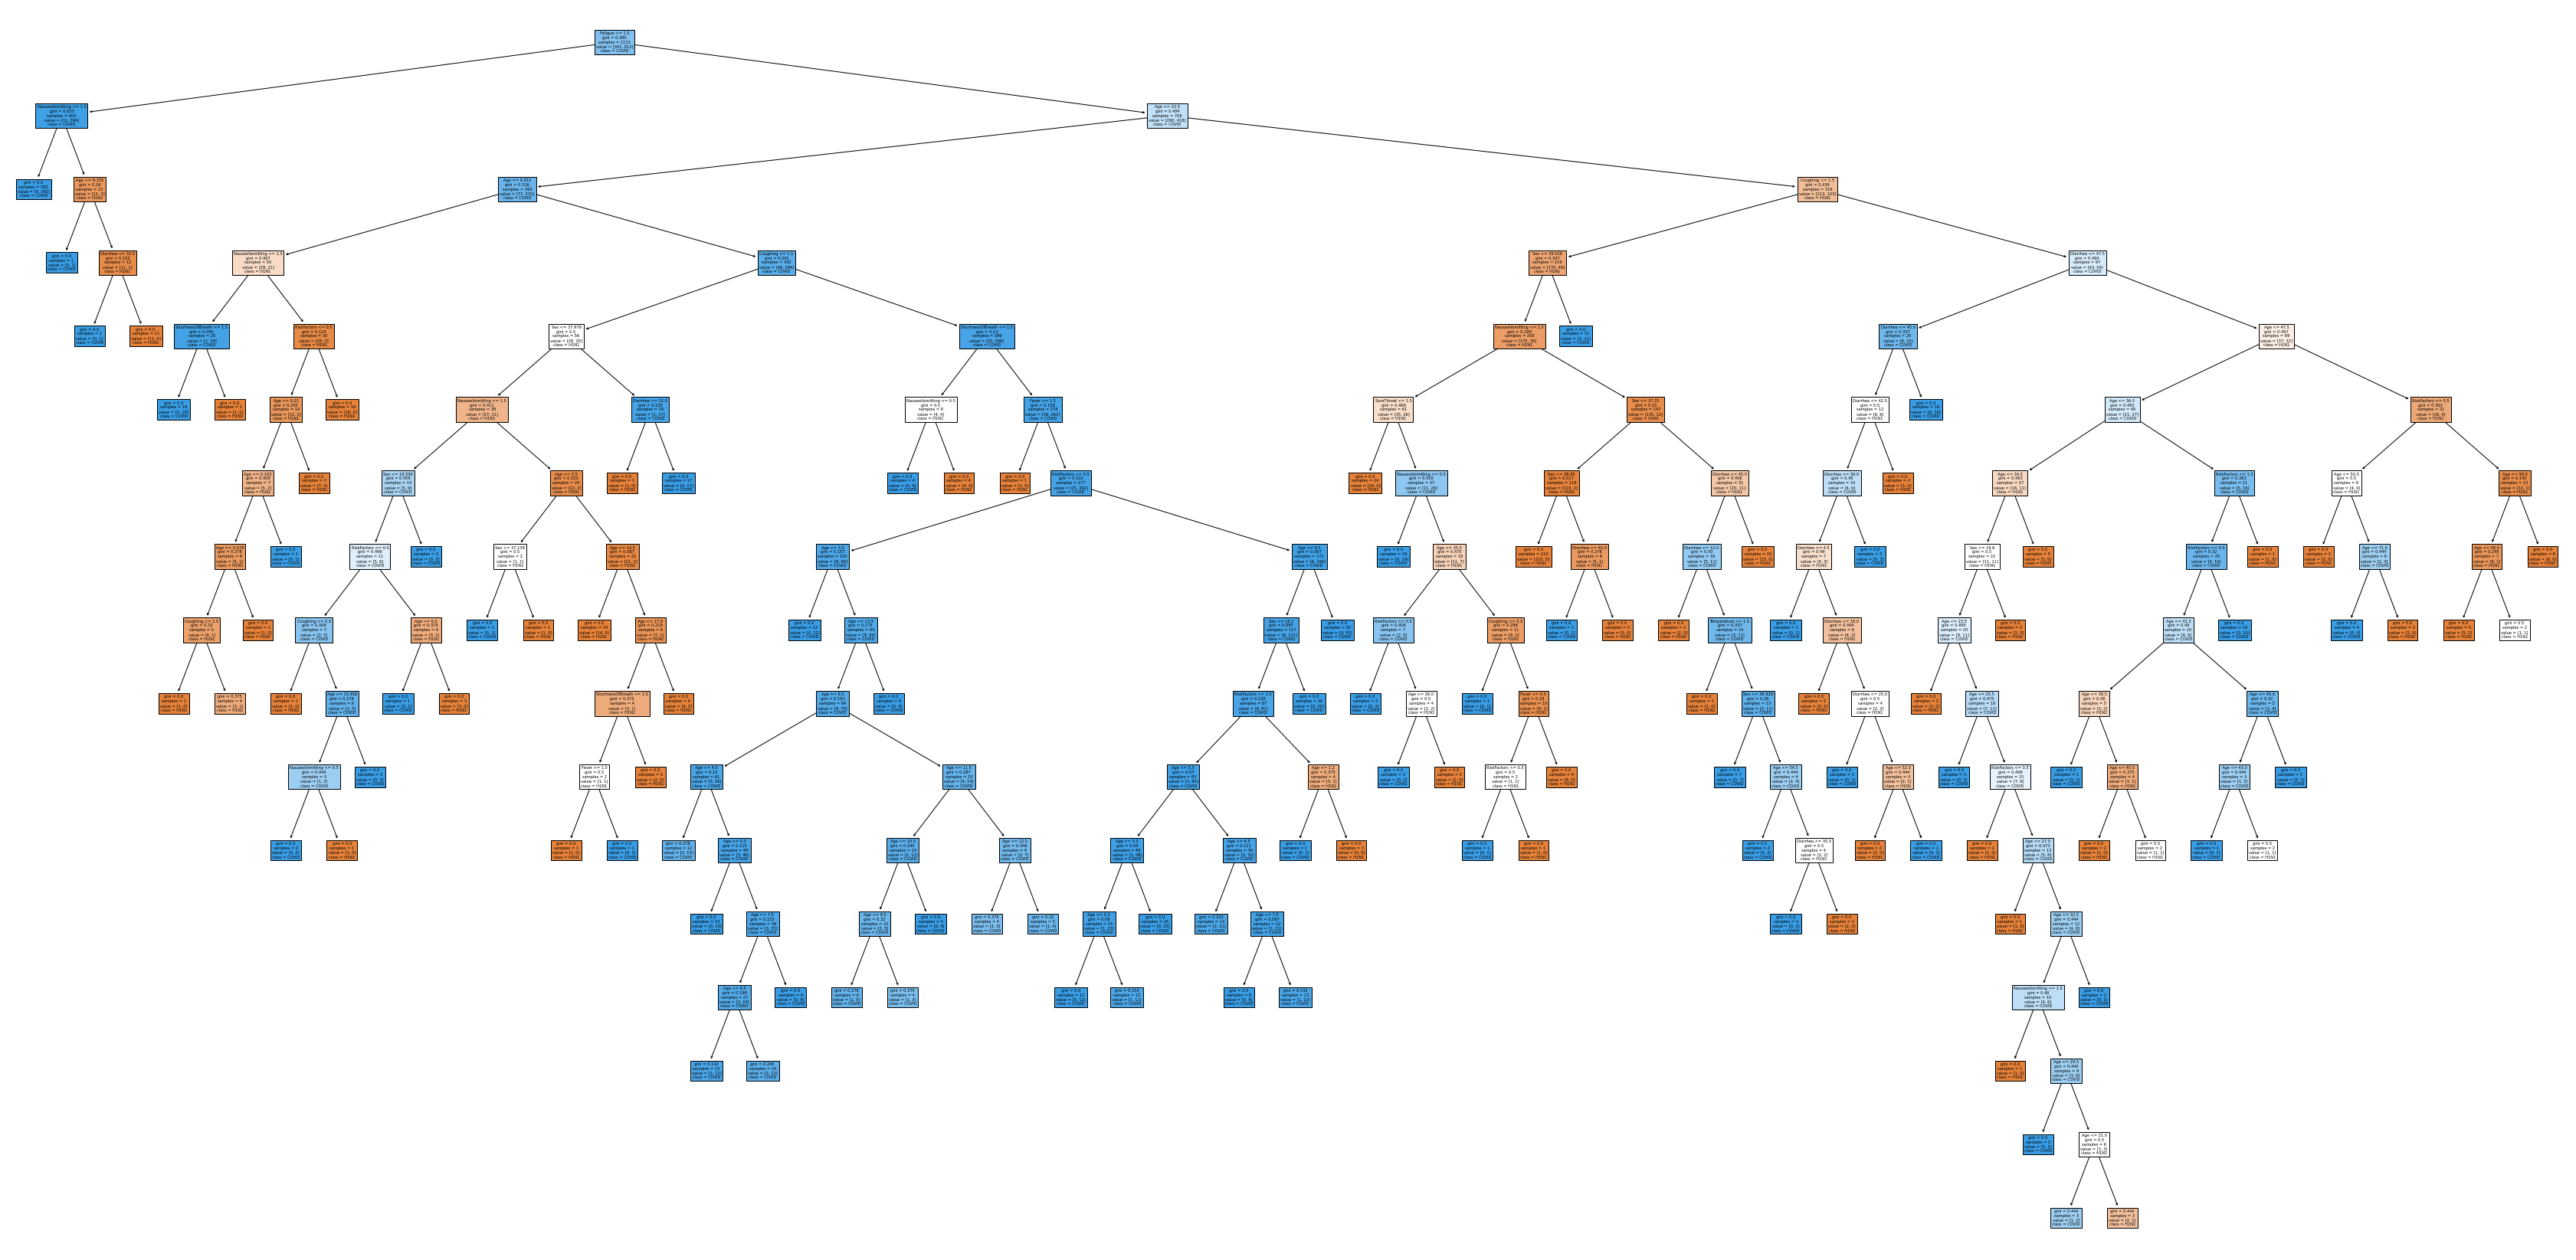

In [26]:
#time for generate the decision tree
a = timer()
dt = DecisionTreeClassifier(criterion = "gini")
dt.fit(x_train, y_train)
b = timer()

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['H1N1', "COVID"],filled=True);

In [27]:
#time for prediction
c = timer()
y_test_pred = dt.predict(x_test)
d = timer()

delta = b - a
delta1 = d - c

print("time for generate decision tree: " + str(delta) + " seconds")
print("time for prediction: " + str(delta1) + " seconds")

time for generate decision tree: 0.0033027999999717395 seconds
time for prediction: 0.002622799999983272 seconds


In [29]:
print("Accuracy Score-Test: ",accuracy_score(y_test, y_test_pred))

Accuracy Score-Test:  0.8682795698924731


In [31]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  82
TP  241
FN  19
FP  30
[[ 82  30]
 [ 19 241]]


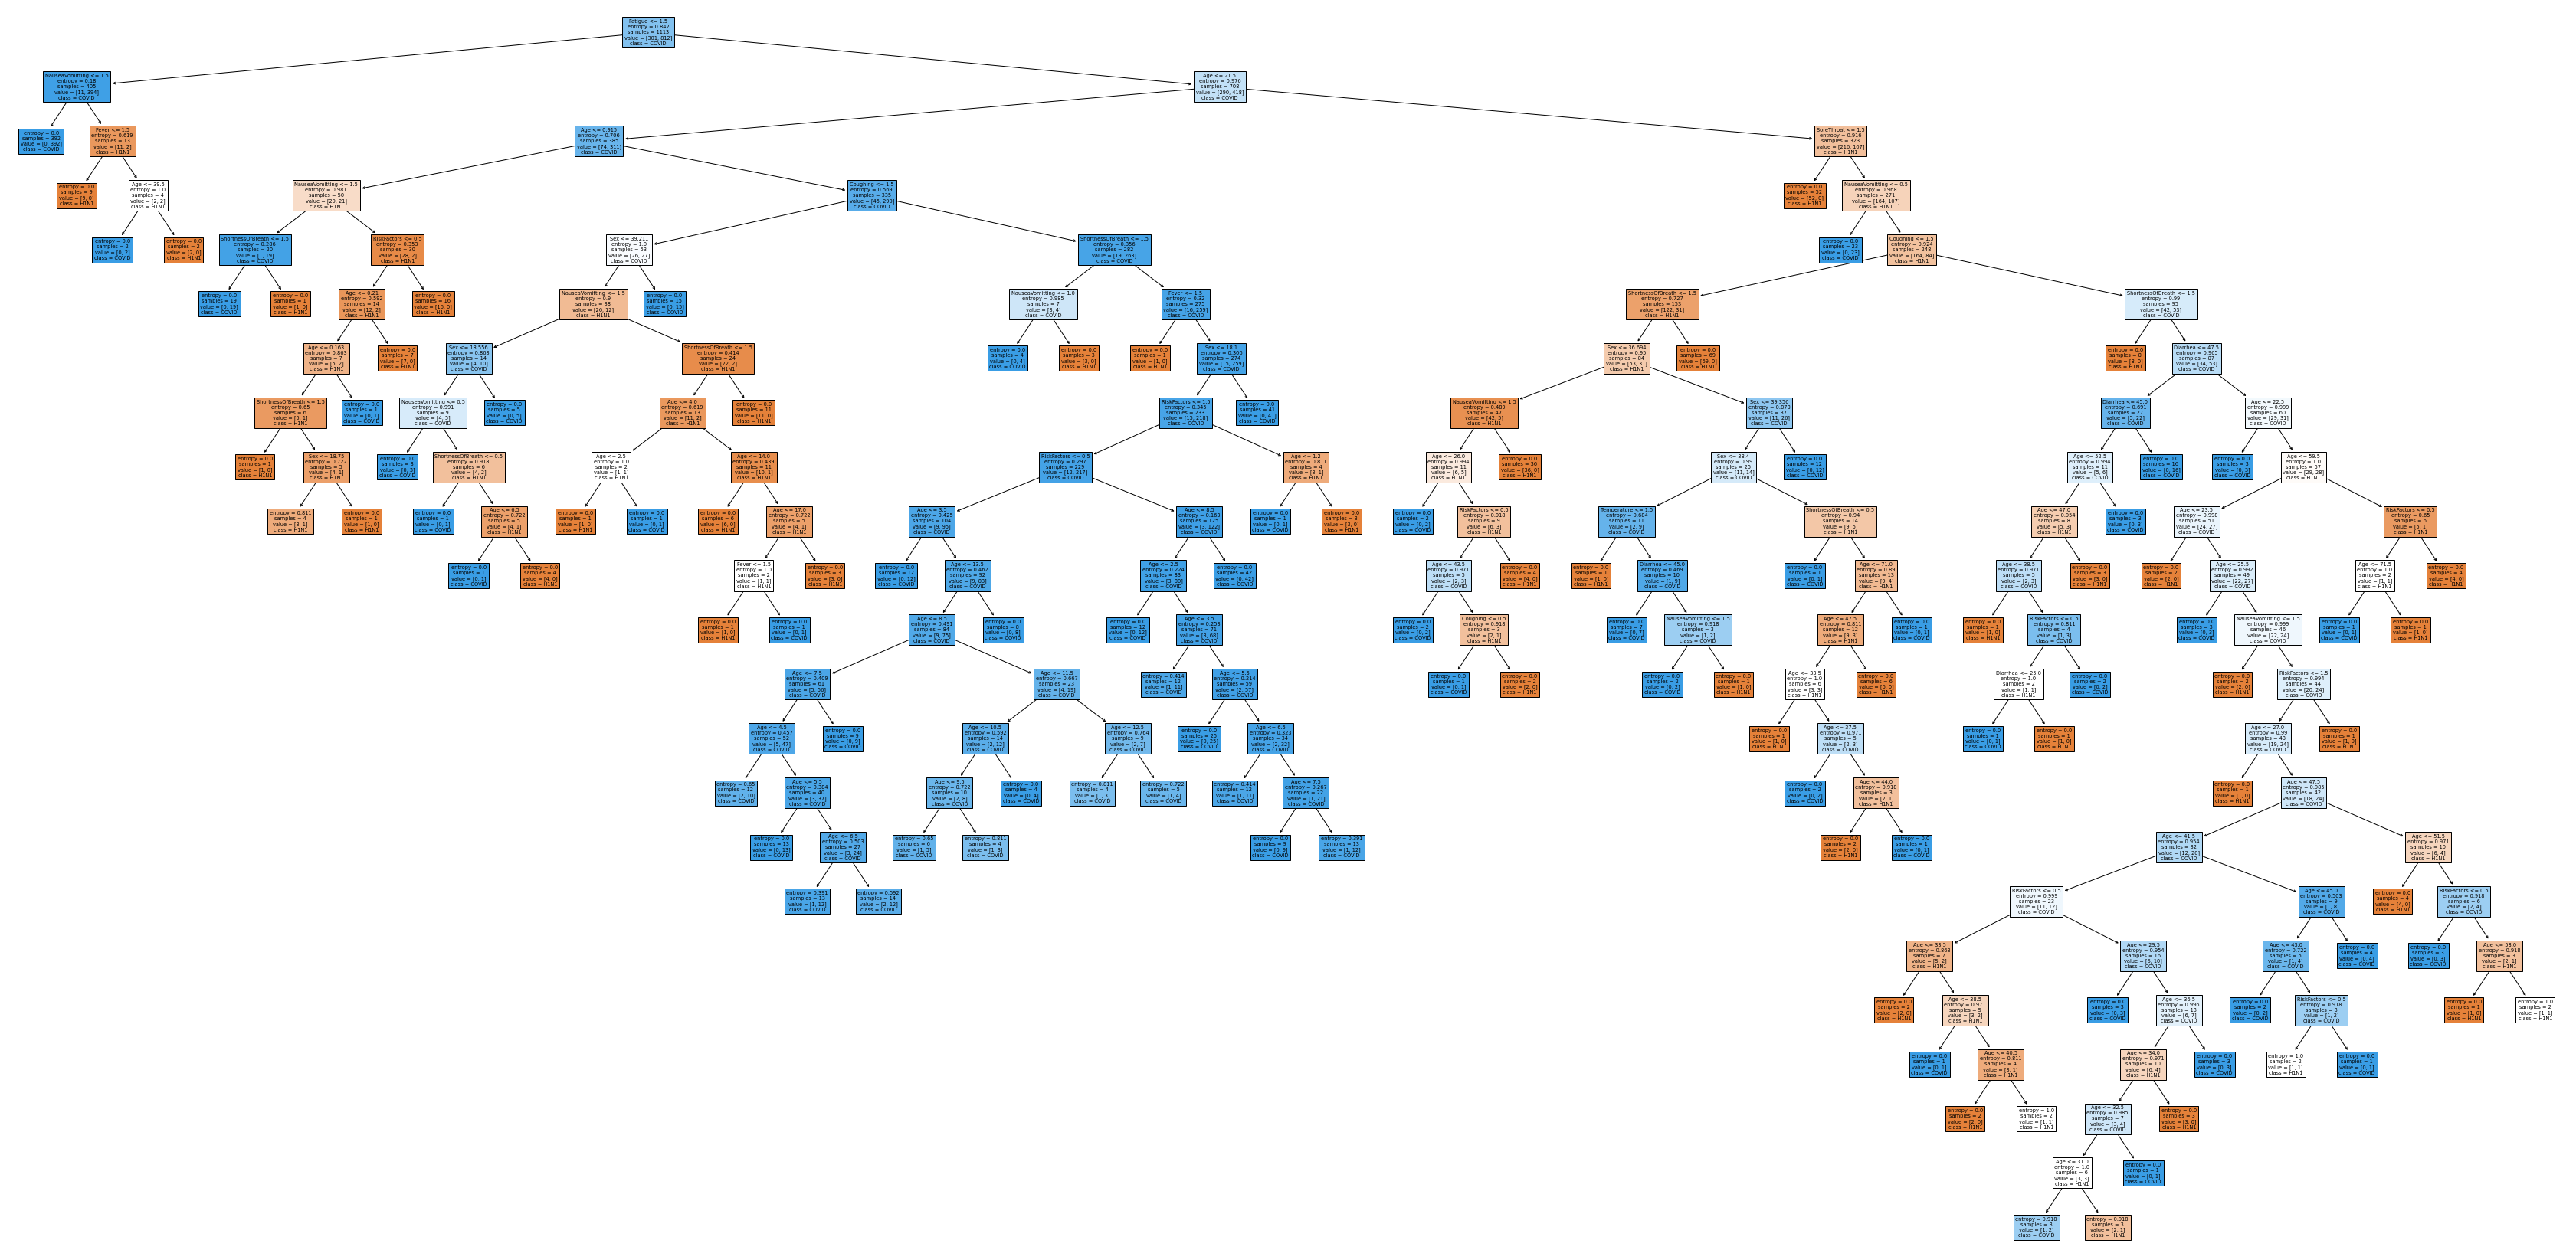

In [32]:
#time for generate the decision tree
a = timer()
dt = DecisionTreeClassifier(criterion = "entropy")
dt.fit(x_train, y_train)
b = timer()



plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['H1N1', "COVID"],filled=True);

In [33]:
#time for prediction
c = timer()
y_test_pred = dt.predict(x_test)
d = timer()

delta = b - a
delta1 = d - c

print("time for generate decision tree: " + str(delta) + " seconds")
print("time for prediction: " + str(delta1) + " seconds")

time for generate decision tree: 0.0035377999999468557 seconds
time for prediction: 0.001997000000017124 seconds


In [49]:
print("Accuracy Score-Test: ",accuracy_score(y_test, y_test_pred))

Accuracy Score-Train:  0.9059139784946236


In [50]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  95
TP  242
FN  18
FP  17
[[ 95  17]
 [ 18 242]]


In [51]:
dt.tree_.node_count

213